# **Tutorial 6: Selección de Atributos**

El objetivo de este tutorial es relacionarse con las técnicas de reducción de dimensionalidad y su implementación en Python con Scikit-learn.

En general es mejor contar con más información para poder resolver los problemas, pero mientras más dimensiones tengan los datos, mayor será el costo de ajustar los modelos, y no es seguro ni que el rendimiento del modelo sea mucho mejor que con menos atributos, ni que todos los atributos aporten información relevante o necesaria para el problema. Por estos motivos una parte importante del pre-procesamiento de los datos es la reducción de dimensionalidad o selección de atributos, donde se busca eliminar atributos irrelevantes para el problema y seleccionar a los más importantes.

## Datos

Para este tutorial utilizaremos datos de los clientes de una empresa, donde el objetivo es predecir la variable `response`.

In [ ]:
# Instalar librerías | no es necesario en Colab
!pip install scikit-learn numpy pandas gdown

In [ ]:
import gdown
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
gdown.download(id='1H0mkJp0R-yg1CW7adHIiM1pSes0bpKGm', output='data.csv', quiet=True)
data = pd.read_csv('/content/data.csv', sep='\t')

In [ ]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
data.drop(columns=['ID', 'Dt_Customer', 'Education', 'Marital_Status'], inplace=True)
data.dropna(inplace=True)

In [ ]:
split = train_test_split(data.drop(columns=['Response']), data.Response, test_size=0.3, stratify=data.Response)
X_train, X_test, y_train, y_test = split

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
pd.DataFrame(X_train, columns=data.columns[:-1]).head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue
0,0.341507,-1.104828,1.025105,-0.919775,-0.297770,-0.883301,-0.011465,-0.537495,0.025574,-0.431496,...,-0.551578,1.089492,-0.278984,-0.286958,-0.274935,-0.262522,-0.111365,-0.098821,0.0,0.0
1,0.173462,-0.205252,-0.832299,0.920962,-0.471629,0.896408,1.099950,-0.052527,1.560512,2.178703,...,1.310222,1.502042,-0.278984,-0.286958,-0.274935,-0.262522,-0.111365,-0.098821,0.0,0.0
2,-0.162628,0.235684,-0.832299,2.761699,-0.228226,0.368862,-0.530126,-0.338069,-0.685739,-0.254104,...,0.379322,-0.148156,-0.278984,-0.286958,-0.274935,-0.262522,-0.111365,-0.098821,0.0,0.0
3,1.097709,1.052934,-0.832299,-0.919775,0.154265,1.733205,2.087875,2.444831,2.028481,0.734224,...,1.310222,-1.385804,-0.278984,3.484834,-0.274935,-0.262522,-0.111365,-0.098821,0.0,0.0
4,0.341507,0.061900,1.025105,-0.919775,-1.445243,0.256683,-0.036163,0.577478,1.747700,0.379440,...,0.069022,0.264393,3.584441,-0.286958,-0.274935,-0.262522,-0.111365,-0.098821,0.0,0.0


## Selección en Base a un Modelo

La selección de atributos en base a un modelo consiste en asignarle valores de importancia a los atributos, según los resultados de un modelo, y luego seleccionar los $k$ más relevantes. El modelo utilizado para estimar la importancia puede ser el mismo que se desea entrenar, aunque lo más común y conveniente es usar uno con menor de entrenar.

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [ ]:
# modelo para estimar la importancia
clf = SVC(C=0.1, kernel='linear')

# estimación de importancia de los atributos
selector = SelectFromModel(estimator=clf, max_features=12)
selector.fit(X_train, y_train)

SelectFromModel(estimator=SVC(C=0.1, kernel='linear'), max_features=12)

In [ ]:
selector.threshold_

0.10779832338124518

In [ ]:
# máscara de columnas que pasan la selección
selector.get_support()

array([False, False, False,  True,  True, False, False,  True, False,
       False, False,  True, False,  True,  True,  True,  True, False,
        True,  True,  True, False, False, False])

In [ ]:
print('Atributos seleccionados:\n')
print(data.columns[:-1][selector.get_support()])

Atributos seleccionados:

Index(['Teenhome', 'Recency', 'MntMeatProducts', 'NumDealsPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2'],
      dtype='object')


In [ ]:
# selección de atributos
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

In [ ]:
pd.DataFrame(X_train_selected, columns=data.columns[:-1][selector.get_support()]).head()

,Teenhome,Recency,MntMeatProducts,NumDealsPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2
0,-0.919775,-0.297770,-0.537495,-0.183668,-0.913220,-0.551578,1.089492,-0.278984,-0.274935,-0.262522,-0.111365
1,0.920962,-0.471629,-0.052527,1.918689,-0.210638,1.310222,1.502042,-0.278984,-0.274935,-0.262522,-0.111365
2,2.761699,-0.228226,-0.338069,0.341921,0.140652,0.379322,-0.148156,-0.278984,-0.274935,-0.262522,-0.111365
3,-0.919775,0.154265,2.444831,-0.709258,0.491943,1.310222,-1.385804,-0.278984,-0.274935,-0.262522,-0.111365
4,-0.919775,-1.445243,0.577478,0.341921,1.897105,0.069022,0.264393,3.584441,-0.274935,-0.262522,-0.111365


Se reduce la dimensión de los datos de 24 a 11 atributos, con una pérdida de sólo 0.02 en f1-score.

In [ ]:
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       565
           1       0.60      0.26      0.36       100

    accuracy                           0.86       665
   macro avg       0.74      0.61      0.64       665
weighted avg       0.84      0.86      0.84       665



In [ ]:
clf.fit(X_train_selected, y_train)

y_pred = clf.predict(X_test_selected)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       565
           1       0.56      0.25      0.34       100

    accuracy                           0.86       665
   macro avg       0.72      0.61      0.63       665
weighted avg       0.83      0.86      0.83       665



## Seleccionar K Mejores

El método `SelectKBest` de scikit-learn aplica una función para asignar valores de importancia a los atributos y selecciona los $k$ mejores. Las métricas más comunes se basan en la dependencia o varianza de los atributos, si hay dependencia entre dos variables, entonces una de las dos sobra, y si la varianza de una es muy baja, entonces es menos probable que aporte información que permita diferenciar las instancias. Algunas de las métricas disponibles en `sklearn` son:

- **Información Mutua**: mide la dependencia entre variables.
- **Chi-cuadrado**: Sólo para valores no negativos. Mide la dependencia entre variables estocásticas.
- **f_classif**: Calcula el f-valor por análisis de varianza de la mustra.

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, chi2, f_classif

In [ ]:
selector = SelectKBest(mutual_info_classif, k=12)

X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

In [ ]:
pd.DataFrame(X_train_selected, columns=data.columns[:-1][selector.get_support()]).head()

,Income,Teenhome,Recency,MntWines,MntMeatProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,AcceptedCmp3,AcceptedCmp5,AcceptedCmp1
0,81741.0,0.0,75.0,249.0,940.0,38.0,6.0,6.0,7.0,0.0,0.0,0.0
1,36262.0,0.0,24.0,88.0,54.0,153.0,3.0,5.0,3.0,1.0,0.0,0.0
2,62745.0,1.0,89.0,562.0,464.0,32.0,7.0,8.0,11.0,0.0,0.0,0.0
3,36864.0,1.0,53.0,204.0,39.0,89.0,5.0,2.0,4.0,0.0,0.0,0.0
4,80995.0,1.0,83.0,860.0,409.0,56.0,8.0,9.0,4.0,0.0,0.0,0.0


In [ ]:
clf = SVC(C=0.1, kernel='linear')
clf.fit(X_train_selected, y_train)

y_pred = clf.predict(X_test_selected)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       565
           1       0.25      0.02      0.04       100

    accuracy                           0.84       665
   macro avg       0.55      0.50      0.48       665
weighted avg       0.76      0.84      0.78       665



## Remover Atributos con Poca Varianza

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
selector = VarianceThreshold(threshold=4)

X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

In [ ]:
pd.DataFrame(X_train_selected, columns=data.columns[:-1][selector.get_support()]).head()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,1980.0,81741.0,75.0,249.0,153.0,940.0,58.0,134.0,38.0,6.0,6.0,7.0,2.0
1,1983.0,36262.0,24.0,88.0,39.0,54.0,64.0,28.0,153.0,3.0,5.0,3.0,6.0
2,1965.0,62745.0,89.0,562.0,21.0,464.0,28.0,10.0,32.0,7.0,8.0,11.0,5.0
3,1957.0,36864.0,53.0,204.0,5.0,39.0,17.0,0.0,89.0,5.0,2.0,4.0,8.0
4,1958.0,80995.0,83.0,860.0,28.0,409.0,73.0,56.0,56.0,8.0,9.0,4.0,4.0


In [ ]:
clf = SVC(C=0.1, kernel='linear')
clf.fit(X_train_selected, y_train)

y_pred = clf.predict(X_test_selected)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91       565
           1       0.42      0.10      0.16       100

    accuracy                           0.84       665
   macro avg       0.64      0.54      0.54       665
weighted avg       0.79      0.84      0.80       665



## Principal Component Analysis

Principal Component Analysis (PCA) es una técnica de reducción de dimensionalidad que, en lugar de seleccionar o eliminar atributos, aplica una transformación lineal a los datos, que reduce su dimensión a los $k$ vectores que "transportan" más información.

In [ ]:
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

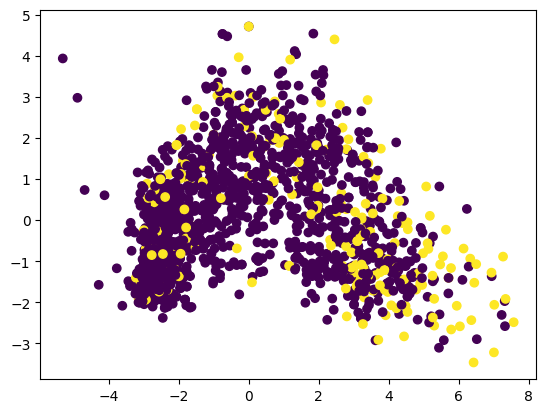

In [ ]:
fig, ax = plt.subplots()

ax.scatter(X_train_pca.T[0], X_train_pca.T[1], c=y_train)

plt.show()

In [ ]:
pca = PCA(n_components=12)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

clf = SVC(C=0.1, kernel='linear')
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       565
           1       0.89      0.24      0.38       100

    accuracy                           0.88       665
   macro avg       0.88      0.62      0.66       665
weighted avg       0.88      0.88      0.85       665

